In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss
import pandas as pd

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [4]:
from utils.tests import Drop_tester,misclas_losses

In [5]:
sns.set(
    style="whitegrid",
    font_scale=1.4,
    rc={
        "lines.linewidth": 2,
        #             "axes.facecolor": ".9",
        'figure.figsize': (12, 6)
    })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [6]:
clr1 = np.array([251, 192, 134]) / 256
clr2 = np.array([125, 225, 125]) / 256
clr3 = np.array([193, 142, 206]) / 256
clr4 = np.array([80, 195, 210]) / 256
clrs=[clr1,clr2,clr3,clr4]

# Train a model

In [40]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_source, y_source), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_source = x_source.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_source = np.expand_dims(x_source, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_source.shape)
print(x_source.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_source = keras.utils.to_categorical(y_source, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [43]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [44]:
x_train.shape

(54000, 28, 28, 1)

In [45]:
batch_size = 64
epochs = 10

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', restore_best_weights=True, patience=5)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_source,y_source,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callback])

Epoch 1/10
844/844 [==============================] - 18s 21ms/step - loss: 0.1989 - accuracy: 0.9383 - val_loss: 0.0505 - val_accuracy: 0.9863
Epoch 2/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 3/10
844/844 [==============================] - 19s 22ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0358 - val_accuracy: 0.9917
Epoch 4/10
844/844 [==============================] - 19s 22ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0321 - val_accuracy: 0.9913
Epoch 5/10
844/844 [==============================] - 47s 56ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 6/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0346 - accuracy: 0.9883 - val_loss: 0.0319 - val_accuracy: 0.9913
Epoch 7/10
844/844 [==============================] - 22s 27ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0258 - val_accuracy:

# MNIST-C (examples of corruptions)

In [46]:
ds_clean = tfds.as_numpy(tfds.load('mnist_corrupted',
               split='test',
               batch_size=-1,
               as_supervised=True,
               shuffle_files=True))

ds_motion = tfds.as_numpy(tfds.load('mnist_corrupted/motion_blur',
               split='test',
               batch_size=-1,
               as_supervised=True,
               shuffle_files=True))

ds_translate = tfds.as_numpy(
    tfds.load('mnist_corrupted/translate',
              split='test',
              batch_size=-1,
              as_supervised=True,
              shuffle_files=True))

ds_zigzag = tfds.as_numpy(
    tfds.load('mnist_corrupted/zigzag',
              split='test',
              batch_size=-1,
              as_supervised=True,
              shuffle_files=True))

(-0.5, 27.5, 27.5, -0.5)

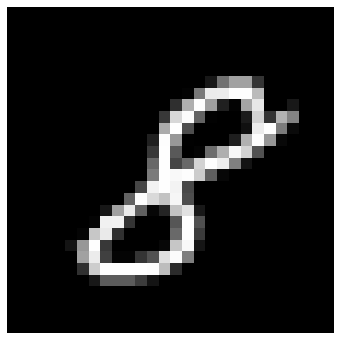

In [48]:
plt.imshow(ds_clean[0][3].reshape([28, 28]), cmap='gray')
plt.axis('off')
# plt.savefig('img/mnist-c-clean.pdf', bbox_inches='tight')

(-0.5, 27.5, 27.5, -0.5)

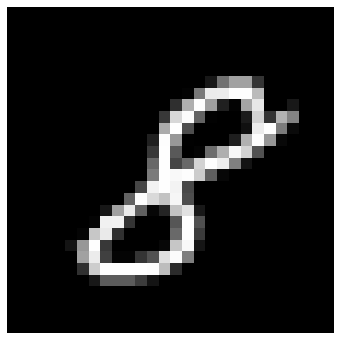

In [39]:
plt.imshow(ds_clean_1[0][3].reshape([28, 28]), cmap='gray')
plt.axis('off')
# plt.savefig('img/mnist-c-clean.pdf', bbox_inches='tight')

(-0.5, 27.5, 27.5, -0.5)

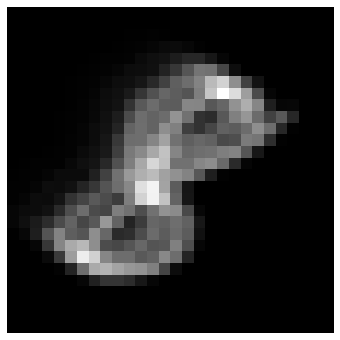

In [37]:
plt.imshow(ds_motion[0][3].reshape([28, 28]), cmap='gray')
plt.axis('off')
# plt.savefig('img/mnist-c-motion.pdf', bbox_inches='tight')

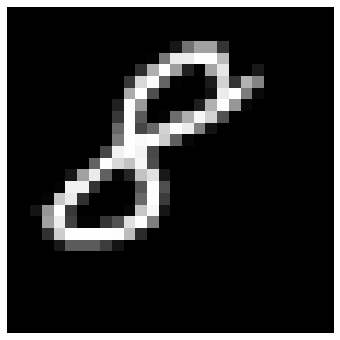

In [17]:
plt.imshow(ds_translate[0][3].reshape([28, 28]), cmap='gray')
plt.axis('off')
# plt.savefig('img/mnist-c-translate.pdf', bbox_inches='tight')

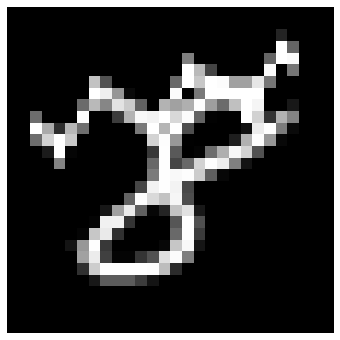

In [18]:
plt.imshow(ds_zigzag[0][3].reshape([28, 28]), cmap='gray')
plt.axis('off')
# plt.savefig('img/mnist-c-zigzag.pdf', bbox_inches='tight')

# Running a procedure for a trained network

In [52]:
clean_test_labels = keras.utils.to_categorical(ds_clean[1], num_classes)
# fog_test_labels = keras.utils.to_categorical(ds_fog[1], num_classes)
motion_test_labels = keras.utils.to_categorical(ds_motion[1], num_classes)
zigzag_test_labels = keras.utils.to_categorical(ds_zigzag[1], num_classes)
translate_test_labels = keras.utils.to_categorical(ds_translate[1], num_classes)

In [53]:
eps_tol=0.1

tester = Drop_tester()

tester.eps_tol = eps_tol
tester.source_conc_type = 'betting'
tester.target_conc_type = 'conj-bern'
tester.change_type = 'absolute'

In [54]:
x_val.shape

(6000, 28, 28, 1)

In [24]:
# val_preds = model.predict(x_val).argmax(axis=1)
# ind_loss_source = misclas_losses(y_val.argmax(axis=1),val_preds)

# tester.estimate_risk_source(ind_loss_source)

In [67]:
clean_lower_bounds = list()
# fog_lower_bounds = list()
motion_lower_bounds = list()
zigzag_lower_bounds = list()
translate_lower_bounds = list()
source_upper_bounds = list()

In [68]:
indices = np.arange(10000)
batch_size=50
num_of_batches = 40
num_of_repeats = 50

In [69]:
for cur_run in range(num_of_repeats):
    
    indices = np.arange(10000)
    np.random.shuffle(indices)
    risk_source_indices = indices[:1000]
    risk_target_indices = indices[1000:]

    X_risk_source = ds_clean[0][risk_source_indices]
    y_risk_source = clean_test_labels[risk_source_indices].argmax(axis=1)
    
    val_preds = model.predict(X_risk_source).argmax(axis=1)
    ind_loss_source = misclas_losses(y_risk_source,val_preds)

    tester.estimate_risk_source(ind_loss_source)

    source_upper_bounds+=[tester.source_rejection_threshold]
    
    clean_lower_bounds += [[]]
    translate_lower_bounds += [[]]
    motion_lower_bounds += [[]]
    zigzag_lower_bounds += [[]]

    np.random.shuffle(risk_target_indices)
    cur_X = ds_clean[0][risk_target_indices][:num_of_batches * batch_size] / 255
    cur_y = clean_test_labels[risk_target_indices][:num_of_batches * batch_size]

    y_pred_test = model.predict(cur_X).argmax(axis=1)
    all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)
    for cur_batch in range(num_of_batches):

        cur_losses = all_losses[:(cur_batch + 1) * batch_size]
        tester.estimate_risk_target(cur_losses)
        clean_lower_bounds[cur_run] += [tester.target_risk_lower_bound]

    np.random.shuffle(risk_target_indices)
    cur_X = ds_translate[0][risk_target_indices][:num_of_batches * batch_size] / 255
    cur_y = translate_test_labels[risk_target_indices][:num_of_batches * batch_size]

    y_pred_test = model.predict(cur_X).argmax(axis=1)
    all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

    for cur_batch in range(num_of_batches):

        cur_losses = all_losses[:(cur_batch + 1) * batch_size]
        tester.estimate_risk_target(cur_losses)
        translate_lower_bounds[cur_run] += [tester.target_risk_lower_bound]

    np.random.shuffle(risk_target_indices)
    cur_X = ds_zigzag[0][risk_target_indices][:num_of_batches * batch_size] / 255
    cur_y = zigzag_test_labels[risk_target_indices][:num_of_batches * batch_size]

    y_pred_test = model.predict(cur_X).argmax(axis=1)
    all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

    for cur_batch in range(num_of_batches):

        cur_losses = all_losses[:(cur_batch + 1) * batch_size]
        tester.estimate_risk_target(cur_losses)
        zigzag_lower_bounds[cur_run] += [tester.target_risk_lower_bound]

    np.random.shuffle(risk_target_indices)
    cur_X = ds_motion[0][risk_target_indices][:num_of_batches * batch_size] / 255
    cur_y = motion_test_labels[risk_target_indices][:num_of_batches * batch_size]

    y_pred_test = model.predict(cur_X).argmax(axis=1)
    all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

    for cur_batch in range(num_of_batches):
        cur_losses = all_losses[:(cur_batch + 1) * batch_size]
        tester.estimate_risk_target(cur_losses)
        motion_lower_bounds[cur_run] += [tester.target_risk_lower_bound]

In [70]:
clean_mean = np.mean(clean_lower_bounds, axis=0)
translate_mean = np.mean(translate_lower_bounds, axis=0)
zigzag_mean = np.mean(zigzag_lower_bounds, axis=0)
motion_mean = np.mean(motion_lower_bounds, axis=0)

clean_std = np.std(clean_lower_bounds, axis=0)
translate_std = np.std(translate_lower_bounds, axis=0)
zigzag_std = np.std(zigzag_lower_bounds, axis=0)
motion_std = np.std(motion_lower_bounds, axis=0)

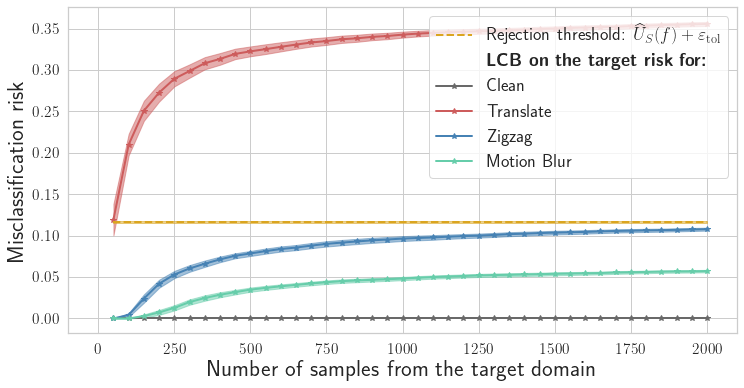

In [71]:
l1, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               clean_mean,
               color='dimgray',
               marker='*',
               label='Clean')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=clean_mean - 2 * clean_std / np.sqrt(num_of_repeats),
                 y2=clean_mean + 2 * clean_std / np.sqrt(num_of_repeats),
                 color='dimgray',
                 alpha=0.5)

l2, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               translate_mean,
               color='indianred',
               marker='*',
               label='Fog')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=translate_mean - 2 * translate_std / np.sqrt(num_of_repeats),
                 y2=translate_mean + 2 * translate_std / np.sqrt(num_of_repeats),
                 color='indianred',
                 alpha=0.5)

l3, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               zigzag_mean,
               color='steelblue',
               marker='*',
               label='Zigzag')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=zigzag_mean - 2 * zigzag_std / np.sqrt(num_of_repeats),
                 y2=zigzag_mean + 2 * zigzag_std / np.sqrt(num_of_repeats),
                 color='steelblue',
                 alpha=0.5)

l4, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               motion_mean,
               color='mediumaquamarine',
               marker='*',
               label='Motion')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=motion_mean - 2 * motion_std / np.sqrt(num_of_repeats),
                 y2=motion_mean + 2 * motion_std / np.sqrt(num_of_repeats),
                 color='mediumaquamarine',
                 alpha=0.5)

l5, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               np.repeat(np.mean(source_upper_bounds), num_of_batches),
               linestyle='dashed',
               c='goldenrod')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=np.mean(source_upper_bounds) -
                 2 * np.std(source_upper_bounds) / np.sqrt(num_of_repeats),
                 y2=np.mean(source_upper_bounds) +
                 2 * np.std(source_upper_bounds) / np.sqrt(num_of_repeats),
                 color='goldenrod',
                 alpha=0.5)

plt.xlabel('Number of samples from the target domain', fontsize=23)
plt.ylabel('Misclassification risk', fontsize=23)

# plt.legend(loc='best', markerscale=1.5, prop={'size': 20})

p5, = plt.plot([0.15], marker='None', linestyle='None', label='dummy-tophead')

plt.ylabel('Misclassification risk', fontsize=23)
plt.xlabel('Number of samples from the target domain', fontsize=23)

categories = [
    'Rejection threshold: ' +
    r'$\widehat{U}_S(f) + \varepsilon_{\mathrm{tol}}$',
    r'$\textbf{LCB on the target risk for:}$ ', 'Clean', 'Translate', 'Zigzag',
    'Motion Blur'
]

leg4 = plt.legend([l5, p5, l1, l2, l3, l4],
                  categories,
                  loc=1,
                  ncol=1,
                  prop={'size': 18})  # Two columns, horizontal group labels

# plt.ylim([-0.05,0.45])
# plt.show()
plt.savefig('img/mnist_c_trained_once.pdf', bbox_inches='tight')

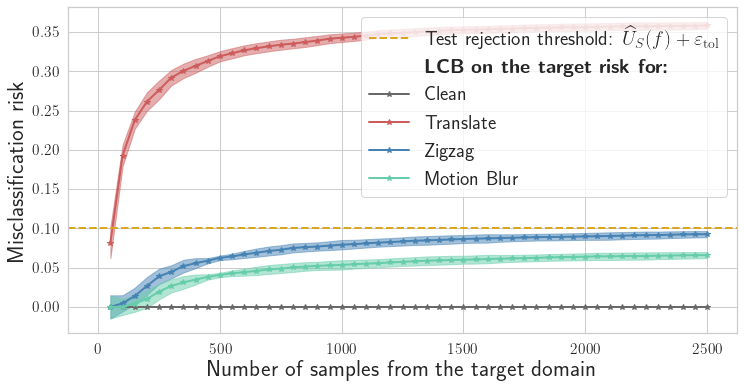

In [180]:
l1, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               clean_mean,
               color='dimgray',
               marker='*',
               label='Clean')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=clean_mean - 2 * clean_std / np.sqrt(num_of_repeats),
                 y2=clean_mean + 2 * clean_std / np.sqrt(num_of_repeats),
                 color='dimgray',
                 alpha=0.5)

l2, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               translate_mean,
               color='indianred',
               marker='*',
               label='Fog')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=translate_mean - 2 * translate_std / np.sqrt(num_of_repeats),
                 y2=translate_mean + 2 * translate_std / np.sqrt(num_of_repeats),
                 color='indianred',
                 alpha=0.5)

l3, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               zigzag_mean,
               color='steelblue',
               marker='*',
               label='Zigzag')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=zigzag_mean - 2 * zigzag_std / np.sqrt(num_of_repeats),
                 y2=zigzag_mean + 2 * zigzag_std / np.sqrt(num_of_repeats),
                 color='steelblue',
                 alpha=0.5)

l4, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               motion_mean,
               color='mediumaquamarine',
               marker='*',
               label='Motion')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=motion_mean - 2 * motion_std / np.sqrt(num_of_repeats),
                 y2=motion_mean + 2 * motion_std / np.sqrt(num_of_repeats),
                 color='mediumaquamarine',
                 alpha=0.5)

l5 = plt.axhline(tester.source_rejection_threshold,
                 linestyle='dashed',
                 c='goldenrod',
                 label='Rejection threshold: ' +
                 r'$\widehat{U}_S(f) + \varepsilon_{\mathrm{tol}}$')

plt.xlabel('Number of samples from the target domain', fontsize=23)
plt.ylabel('Misclassification risk', fontsize=23)

# plt.legend(loc='best', markerscale=1.5, prop={'size': 20})

p5, = plt.plot([0.15], marker='None', linestyle='None', label='dummy-tophead')

plt.ylabel('Misclassification risk', fontsize=23)
plt.xlabel('Number of samples from the target domain', fontsize=23)

categories = [
    'Test rejection threshold: ' +
    r'$\widehat{U}_S(f) + \varepsilon_{\mathrm{tol}}$',
    r'$\textbf{LCB on the target risk for:}$ ', 'Clean', 'Translate', 'Zigzag',
    'Motion Blur'
]

leg4 = plt.legend([l5, p5, l1, l2, l3, l4],
                  categories,
                  loc=1,
                  ncol=1,
                  prop={'size': 20})  # Two columns, horizontal group labels

# plt.ylim([-0.05,0.45])
# plt.show()
plt.savefig('img/mnist_c_trained_once.pdf', bbox_inches='tight')

# Repeat training

In [79]:
num_of_retrain = 5
epochs = 10

indices = np.arange(10000)
batch_size=50
num_of_batches = 40
num_of_repeats = 25

In [82]:
clean_lower_bounds = list()
translate_lower_bounds = list()
motion_lower_bounds = list()
zigzag_lower_bounds = list()

upper_bounds = list()

In [83]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', restore_best_weights=True, patience=5)

In [84]:
for glob_iter in range(num_of_retrain):

#     x_train, x_val, y_train, y_val = train_test_split(x_source,
#                                                       y_source,
#                                                       test_size=0.1)

    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

    history = model.fit(x_source,
                        y_source,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.1,
                        verbose=0,
                        callbacks=[callback])
    
    indices = np.arange(10000)
    np.random.shuffle(indices)
    risk_source_indices = indices[:1000]
    risk_target_indices = indices[1000:]
    
    X_risk_source = ds_clean[0][risk_source_indices]
    y_risk_source = clean_test_labels[risk_source_indices].argmax(axis=1)
    
    val_preds = model.predict(X_risk_source).argmax(axis=1)
    ind_loss_source = misclas_losses(y_risk_source, val_preds)

    tester.estimate_risk_source(ind_loss_source)

    upper_bounds += [tester.source_rejection_threshold]

    clean_lower_bounds += [[]]
    translate_lower_bounds += [[]]
    motion_lower_bounds += [[]]
    zigzag_lower_bounds += [[]]

    for cur_run in range(num_of_repeats):
        clean_lower_bounds[glob_iter] += [[]]
        translate_lower_bounds[glob_iter] += [[]]
        motion_lower_bounds[glob_iter] += [[]]
        zigzag_lower_bounds[glob_iter] += [[]]

        np.random.shuffle(risk_target_indices)
        cur_X = ds_clean[0][risk_target_indices][:num_of_batches * batch_size] / 255
        cur_y = clean_test_labels[risk_target_indices][:num_of_batches * batch_size]

        y_pred_test = model.predict(cur_X).argmax(axis=1)
        all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)
        
        for cur_batch in range(num_of_batches):

            cur_losses = all_losses[:(cur_batch + 1) * batch_size]
            tester.estimate_risk_target(cur_losses)
            clean_lower_bounds[glob_iter][cur_run] += [tester.target_risk_lower_bound]

        np.random.shuffle(risk_target_indices)
        cur_X = ds_translate[0][risk_target_indices][:num_of_batches * batch_size] / 255
        cur_y = translate_test_labels[risk_target_indices][:num_of_batches * batch_size]

        y_pred_test = model.predict(cur_X).argmax(axis=1)
        all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

        for cur_batch in range(num_of_batches):

            cur_losses = all_losses[:(cur_batch + 1) * batch_size]
            tester.estimate_risk_target(cur_losses)
            translate_lower_bounds[glob_iter][cur_run] += [tester.target_risk_lower_bound]

        np.random.shuffle(risk_target_indices)
        cur_X = ds_zigzag[0][risk_target_indices][:num_of_batches * batch_size] / 255
        cur_y = zigzag_test_labels[risk_target_indices][:num_of_batches * batch_size]

        y_pred_test = model.predict(cur_X).argmax(axis=1)
        all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

        for cur_batch in range(num_of_batches):

            cur_losses = all_losses[:(cur_batch + 1) * batch_size]
            tester.estimate_risk_target(cur_losses)
            zigzag_lower_bounds[glob_iter][cur_run] += [tester.target_risk_lower_bound]

        np.random.shuffle(risk_target_indices)
        cur_X = ds_motion[0][risk_target_indices][:num_of_batches * batch_size] / 255
        cur_y = motion_test_labels[risk_target_indices][:num_of_batches * batch_size]

        y_pred_test = model.predict(cur_X).argmax(axis=1)
        all_losses = misclas_losses(cur_y.argmax(axis=1), y_pred_test).astype(int)

        for cur_batch in range(num_of_batches):
            cur_losses = all_losses[:(cur_batch + 1) * batch_size]
            tester.estimate_risk_target(cur_losses)
            motion_lower_bounds[glob_iter][cur_run] += [tester.target_risk_lower_bound]

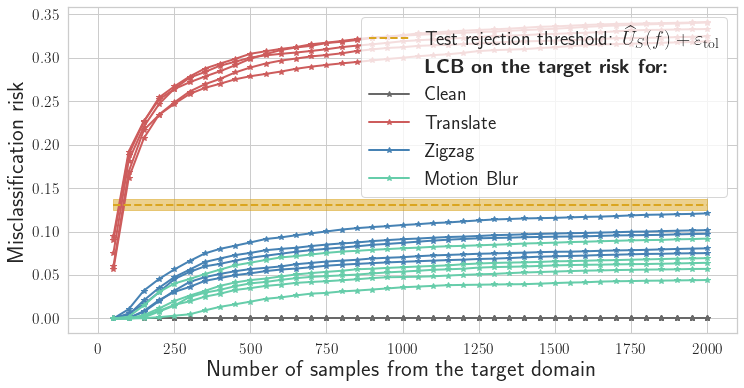

In [85]:
for i in range(num_of_retrain):
    l1, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
                   np.mean(clean_lower_bounds, axis=1)[i],
                   marker='*',
                   c='dimgray')

for i in range(num_of_retrain):
    l2, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
                   np.mean(translate_lower_bounds, axis=1)[i],
                   marker='*',
                   c='indianred')

for i in range(num_of_retrain):
    l3, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
                   np.mean(zigzag_lower_bounds, axis=1)[i],
                   marker='*',
                   c='steelblue')

for i in range(num_of_retrain):
    l4, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
                   np.mean(motion_lower_bounds, axis=1)[i],
                   marker='*',
                   c='mediumaquamarine')

# plt.axhline(np.mean(upper_bounds),
#             linestyle='dashed',
#             c='goldenrod',
#             label='Source rejection threshold: ' +
#             r'$\widehat{U}_S + \varepsilon_{\mathrm{tol}}$')

l5, = plt.plot((np.arange(num_of_batches) + 1) * batch_size,
               np.repeat(np.mean(upper_bounds), num_of_batches),
               linestyle='dashed',
               c='goldenrod')

plt.fill_between((np.arange(num_of_batches) + 1) * batch_size,
                 y1=np.mean(upper_bounds) -
                 2 * np.std(upper_bounds) / np.sqrt(num_of_retrain),
                 y2=np.mean(upper_bounds) +
                 2 * np.std(upper_bounds) / np.sqrt(num_of_retrain),
                 color='goldenrod',
                 alpha=0.5)

plt.xlabel('Number of samples from the target domain', fontsize=23)
plt.ylabel('Misclassification risk', fontsize=23)

p5, = plt.plot([0.15], marker='None', linestyle='None', label='dummy-tophead')

categories = [
    'Test rejection threshold: ' +
    r'$\widehat{U}_S(f) + \varepsilon_{\mathrm{tol}}$',
    r'$\textbf{LCB on the target risk for:}$ ', 'Clean', 'Translate', 'Zigzag',
    'Motion Blur'
]

leg4 = plt.legend([l5, p5, l1, l2, l3, l4],
                  categories,
                  loc=1,
                  ncol=1,
                  prop={'size': 20})  # Two columns, horizontal group labels

plt.savefig('img/mnist_c_trained_multiple.pdf', bbox_inches='tight')